<a href="https://colab.research.google.com/github/VanduFido/Data-Scientist-Blog-Post/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STACKOVERFLOW 2022 DEMOGRAPHICS


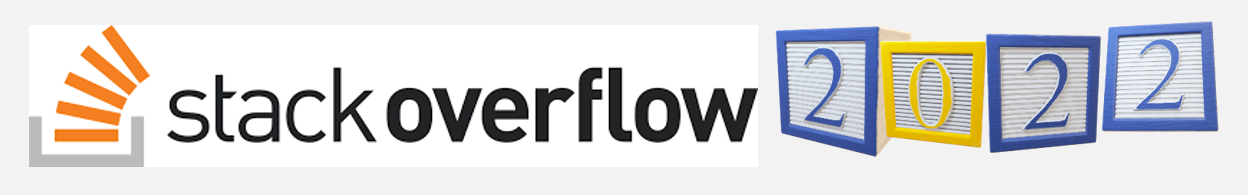

## Introduction

With over 70,000 responses fielded from over 180 countries, Stack Overflow Annual Developer Survey examines all aspects of the developer experience from learning to code to their favorite technologies to version control and the workplace experience of professional developers.

For this project I used the Stack Overflow dataset found on Stack Overflow: https://insights.stackoverflow.com/survey using the CRISP-DM Process of:
* Business Understanding
* Data Understanding
* Prepare Data
* Data Modeling
* Evaluate the Results
* Deploy

## Business Understanding

Understanding the demographics of users of stack overflow gives insight to the business on where their market lies and how best to improve and target audience.

For users, it helps understand better the community they wish to be a part of and the preference of their peers.

To understand the demographics, three questions are answered as follows:
1. What Countres have the most Stack Overflow Activities?

2. What is the distribution of Main Branches using Stack Overflow?

3. What is the Age distribution of Stack Overflow users?


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data

In [2]:
import io
from google.colab import files
 
uploaded = files.upload()

Saving survey_results_public.csv to survey_results_public.csv


In [3]:
df = pd.read_csv('survey_results_public.csv')

In [4]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


### Explore the Data

In [5]:
df.shape

(73268, 79)

The data has 70 columns and 73268 rows

In [6]:
# Check for columns with more than 10000 missing values
for i in df.columns:
  if (df[i].isnull().sum()) > 10000:
    print(i + ":  " + str(df[i].isnull().sum()))

RemoteWork:  14310
CodingActivities:  14369
LearnCodeOnline:  22583
LearnCodeCoursesCert:  43879
YearsCodePro:  21435
DevType:  11966
OrgSize:  22229
PurchaseInfluence:  22299
Currency:  22004
CompTotal:  34846
CompFreq:  28843
DatabaseHaveWorkedWith:  13147
DatabaseWantToWorkWith:  22254
PlatformHaveWorkedWith:  23344
PlatformWantToWorkWith:  32853
WebframeHaveWorkedWith:  19724
WebframeWantToWorkWith:  27146
MiscTechHaveWorkedWith:  28276
MiscTechWantToWorkWith:  36458
ToolsTechHaveWorkedWith:  19097
ToolsTechWantToWorkWith:  26702
VCHostingPersonal use:  73268
VCHostingProfessional use:  73268
OfficeStackAsyncHaveWorkedWith:  27045
OfficeStackAsyncWantToWorkWith:  41196
OfficeStackSyncHaveWorkedWith:  11140
OfficeStackSyncWantToWorkWith:  25580
SOPartFreq:  15039
TBranch:  20598
ICorPM:  36985
WorkExp:  36499
Knowledge_1:  37464
Knowledge_2:  38295
Knowledge_3:  38135
Knowledge_4:  38171
Knowledge_5:  38254
Knowledge_6:  38277
Knowledge_7:  38291
Frequency_1:  37897
Frequency_2:  37

Columns with unique values should be dropped as they cannot be used in the analysis.

In [7]:
# Check for columns with more than 50000 of it's values unique
for i in df.columns:
  if (df[i].nunique() >= 50000):
    print(i + ":  " + str(df[i].nunique()))

ResponseId:  73268


only Response Id has all unique values, hence no variation



In [8]:
# Exploring the number of unique values across all the columns
for i in df.columns:
  print(i + ":  " + str(df[i].nunique()))

ResponseId:  73268
MainBranch:  6
Employment:  103
RemoteWork:  3
CodingActivities:  63
EdLevel:  9
LearnCode:  737
LearnCodeOnline:  7192
LearnCodeCoursesCert:  206
YearsCode:  52
YearsCodePro:  52
DevType:  9984
OrgSize:  10
PurchaseInfluence:  3
BuyNewTool:  125
Country:  180
Currency:  142
CompTotal:  3179
CompFreq:  3
LanguageHaveWorkedWith:  25068
LanguageWantToWorkWith:  23952
DatabaseHaveWorkedWith:  4223
DatabaseWantToWorkWith:  4291
PlatformHaveWorkedWith:  1500
PlatformWantToWorkWith:  1435
WebframeHaveWorkedWith:  8259
WebframeWantToWorkWith:  8884
MiscTechHaveWorkedWith:  4205
MiscTechWantToWorkWith:  5086
ToolsTechHaveWorkedWith:  951
ToolsTechWantToWorkWith:  1245
NEWCollabToolsHaveWorkedWith:  15063
NEWCollabToolsWantToWorkWith:  9188
OpSysProfessional use:  55
OpSysPersonal use:  56
VersionControlSystem:  16
VCInteraction:  15
VCHostingPersonal use:  0
VCHostingProfessional use:  0
OfficeStackAsyncHaveWorkedWith:  1085
OfficeStackAsyncWantToWorkWith:  825
OfficeStackSy

There are columns with 0 unique values which mean that there are no value. Hence would be dropped.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [10]:
# Check number of duplicate rows
sum(df.duplicated())

0

> There are no duplicate rows

### Data Cleaning

In [11]:
# duplicate the dataset for cleaning
df1 = df.copy()

#### Missing values

In [12]:
# drop columns with missing values greater than 20000
for i in df1.columns:
  if df1[i].isnull().sum() > 20000:
    df1.drop(i, axis =1, inplace = True)

In [13]:
# check the columns that are left
df1.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'YearsCode', 'DevType',
       'BuyNewTool', 'Country', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'OfficeStackSyncHaveWorkedWith', 'Blockchain',
       'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'SurveyLength', 'SurveyEase'],
      dtype='object')

In [14]:
# check for the new shape of the dataset
df1.shape

(73268, 38)

Missing rows would not be deleted for this analysis as they won't affect analysis and removing them would reduce sample size.

### Analysis

Questions to be answered by this analysis are:

1. What Countres have the most Stack Overflow Activities?
2. What is the distribution of Main Branches using Stack Overflow?
3. What is the Age distribution of Stack Overflow users?

In [22]:
# Create function to create bar chart
def top_plots(a, top, orientation):
  """
  """
  counts = df1[a].value_counts()
  counts_top = counts.head(top)
  counts_top = counts_top.sort_values()
  if orientation in ['h']:
    counts_top.plot.barh(color = '#800020')

    plt.xlabel('Count')
    plt.ylabel(str(a))
    title = 'Top ' + str(top) + ' ' + a
    plt.title(title)
    plt.show()
  else:
    counts_top.plot.bar(color = '#800020')

    plt.xlabel(str(a))
    plt.ylabel('Count')
    title = 'Top ' + str(top) + ' ' + a
    plt.title(title)
    plt.show()


#### Question 1: What Countries have the most Stack Overflow Activities?

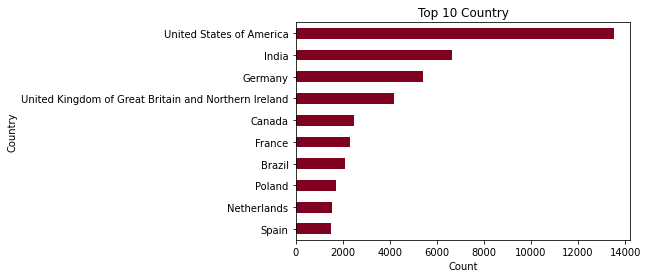

In [23]:
top_plots('Country', 10, 'h')

> Most users are from the United States. The top 10 countries across America, Europe and Canada. Just one asian country, India.

#### Question 2 : What is the distribution of Main Branches using Stack Overflow?

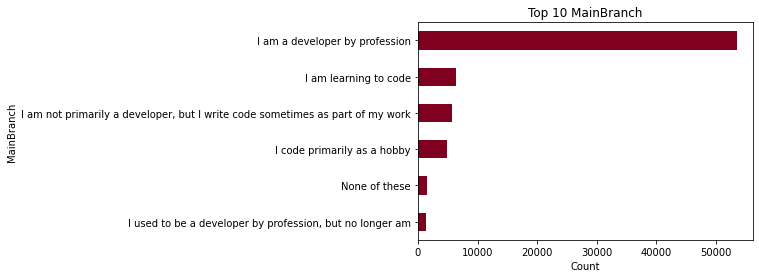

In [24]:
top_plots('MainBranch', 10, 'h')

> More than three quarters of the users are developers by profession. the least, each making less than 5000, either used to be developers but no longer are, or do not fit into any of the categories.

#### Question 3: What is the Age distribution of Stack Overflow users?

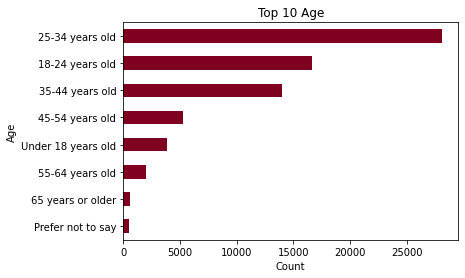

In [25]:
top_plots('Age', 10, 'h')

> Majority of stack Overflow users are between the ages of 25 - 34. 

> It seemed the older the age group was, the lesser the number the user. The difference however, it is different for ages as they go lower than 25. 

> The lower the age group is than 25, the lesser the number of users.

## Communicate Business Insights

The results of this analysis were written up in a Medium blog at 

## Conclusion
* Unites State of America has the most number of Stack Overflow users
* More than two thirds of users are developers by profession
* About half of the users are between the ages of 25-34

## Resources

https://insights.stackoverflow.com/survey